In [32]:
import pandas as pd
from IPython.display import display

base_path = '/files/Project/'

# Common dates for filtering
start_date = pd.to_datetime('2023-04-11')
end_date = pd.to_datetime('2024-03-04')

# Filtering data by date
def filter_data_by_date(df, start_date, end_date, date_column):
    mask = (df[date_column] >= start_date) & (df[date_column] <= end_date)
    return df.loc[mask]

# Loading and preparing data
def load_crypto_data(file_path):
    df = pd.read_csv(file_path, delimiter=';', decimal=',', skiprows=1)
    df.rename(columns={df.columns[0]: 'Date_time', df.columns[1]: 'Close'}, inplace=True)
    # Adjusting date format here
    df['Date_time'] = pd.to_datetime(df['Date_time'], format='%d/%m/%Y %H:%M')
    return df

def load_telegram_data(file_path):
    df = pd.read_csv(file_path, delimiter=';', decimal=',')
    df.drop(df.columns[0], axis=1, inplace=True)
    # Adjusting date format here for Telegram if necessary
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
    return df

try:
    # Loading and filtering data
    ada_df = filter_data_by_date(load_crypto_data(base_path + 'ADA_Cardano.csv'), start_date, end_date, 'Date_time')
    bch_df = filter_data_by_date(load_crypto_data(base_path + 'BCH_Bitcoin_cash.csv'), start_date, end_date, 'Date_time')
    btc_df = filter_data_by_date(load_crypto_data(base_path + 'BTC_Bitcoin.csv'), start_date, end_date, 'Date_time')
    eth_df = filter_data_by_date(load_crypto_data(base_path + 'ETH_Ethereum.csv'), start_date, end_date, 'Date_time')
    ltc_df = filter_data_by_date(load_crypto_data(base_path + 'LTC_Litecoin.csv'), start_date, end_date, 'Date_time')
    xrp_df = filter_data_by_date(load_crypto_data(base_path + 'XRP_Ripple.csv'), start_date, end_date, 'Date_time')
    telegram_df = filter_data_by_date(load_telegram_data(base_path + 'Telegram_sentiment.csv'), start_date, end_date, 'date')

    # Displaying filtered data for verification
    print("ADA Cardano - Preview of filtered data:")
    display(ada_df)
    print("\nBCH Bitcoin Cash - Preview of filtered data:")
    display(bch_df)
    print("\nBTC Bitcoin - Preview of filtered data:")
    display(btc_df)
    print("\nETH Ethereum - Preview of filtered data:")
    display(eth_df)
    print("\nLTC Litecoin - Preview of filtered data:")
    display(ltc_df)
    print("\nXRP Ripple - Preview of filtered data:")
    display(xrp_df)
    print("\nTelegram Sentiment - Preview of filtered data:")
    display(telegram_df)
    
    # Additional analysis
    telegram_df['date'] = pd.to_datetime(telegram_df['date']).dt.date
    daily_sentiment = telegram_df.groupby('date')['compound'].mean().reset_index()
    daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

    # Define the function to calculate daily returns
    def calculate_daily_returns(df):
        df['daily_return'] = df['Close'].pct_change()
        return df

    btc_df.columns = ['Date_time', 'Close']
    btc_df = calculate_daily_returns(btc_df)
    btc_df['Date_time'] = pd.to_datetime(btc_df['Date_time'])  # Ensure the date column is in datetime format

    # Merge sentiment and Bitcoin data, and calculate correlation
    merged_data = pd.merge_asof(daily_sentiment.sort_values('date'), btc_df.sort_values('Date_time'), left_on='date', right_on='Date_time')
    correlation = merged_data['compound'].corr(merged_data['daily_return'])

    # Display the correlation coefficient
    print("Correlation coefficient between daily sentiment scores and daily returns for Bitcoin:", correlation)
    
except pd.errors.ParserError as e:
    print("A parsing error occurred:", e)
except FileNotFoundError as e:
    print("File not found:", e)
except Exception as e:
    print("An unexpected error occurred:", e)


ADA Cardano - Preview of filtered data:


,Date_time,Close
925,2024-03-04 00:00:00,0.7367
926,2024-03-03 23:00:00,0.7283
927,2024-03-03 22:00:00,0.7305
928,2024-03-03 21:00:00,0.7277
929,2024-03-03 20:00:00,0.7256
...,...,...
8779,2023-04-11 17:00:00,0.4020
8780,2023-04-11 16:00:00,0.4003
8781,2023-04-11 15:00:00,0.4055
8782,2023-04-11 14:00:00,0.4040



BCH Bitcoin Cash - Preview of filtered data:


,Date_time,Close
925,2024-03-04 00:00:00,467.24
926,2024-03-03 23:00:00,469.85
927,2024-03-03 22:00:00,467.34
928,2024-03-03 21:00:00,465.12
929,2024-03-03 20:00:00,459.56
...,...,...
8289,2023-04-11 18:00:00,129.63
8290,2023-04-11 17:00:00,129.36
8291,2023-04-11 16:00:00,129.73
8292,2023-04-11 15:00:00,128.97



BTC Bitcoin - Preview of filtered data:


,Date_time,Close
923,2024-03-04 00:00:00,63491.2650
924,2024-03-03 23:00:00,63149.6250
925,2024-03-03 22:00:00,62845.0400
926,2024-03-03 21:00:00,62857.3600
927,2024-03-03 20:00:00,62800.5150
...,...,...
8753,2023-04-11 17:00:00,30234.4575
8754,2023-04-11 16:00:00,30154.8480
8755,2023-04-11 15:00:00,30225.8525
8756,2023-04-11 14:00:00,30086.3725



ETH Ethereum - Preview of filtered data:


,Date_time,Close
915,2024-03-04 00:00:00,3485.73
916,2024-03-03 23:00:00,3489.30
917,2024-03-03 22:00:00,3474.60
918,2024-03-03 21:00:00,3478.70
919,2024-03-03 20:00:00,3470.40
...,...,...
8763,2023-04-11 17:00:00,1907.80
8764,2023-04-11 16:00:00,1903.45
8765,2023-04-11 15:00:00,1915.31
8766,2023-04-11 14:00:00,1911.70



LTC Litecoin - Preview of filtered data:


,Date_time,Close
925,2024-03-04 00:00:00,90.37
926,2024-03-03 23:00:00,90.77
927,2024-03-03 22:00:00,90.99
928,2024-03-03 21:00:00,90.62
929,2024-03-03 20:00:00,90.27
...,...,...
8764,2023-04-11 17:00:00,94.92
8765,2023-04-11 16:00:00,94.93
8766,2023-04-11 15:00:00,95.30
8767,2023-04-11 14:00:00,94.83



XRP Ripple - Preview of filtered data:


,Date_time,Close
916,2024-03-04 00:00:00,0.62574
917,2024-03-03 23:00:00,0.62709
918,2024-03-03 22:00:00,0.62861
919,2024-03-03 21:00:00,0.62907
920,2024-03-03 20:00:00,0.62755
...,...,...
8763,2023-04-11 17:00:00,0.51457
8764,2023-04-11 16:00:00,0.51409
8765,2023-04-11 15:00:00,0.51959
8766,2023-04-11 14:00:00,0.51857



Telegram Sentiment - Preview of filtered data:


,channel,id,text,date,views,scores,compound,sentiment_type
2,binancesignals,1380,altcoins started make move bitcoin total marke...,2024-03-03 19:53:00,8066,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,binancesignals,1379,coin maticusdt timeframe 1d observation broken...,2024-03-03 17:52:00,7740,"{'neg': 0.129, 'neu': 0.871, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE
4,binancesignals,1378,coin aptusdt timeframe 1d observation broken m...,2024-03-03 17:50:00,7668,"{'neg': 0.154, 'neu': 0.846, 'pos': 0.0, 'comp...",-0.4767,NEGATIVE
5,binancesignals,1377,ð bitcoin etf growing gold etf losing fund cry...,2024-03-02 18:16:00,8020,"{'neg': 0.23, 'neu': 0.619, 'pos': 0.15, 'comp...",-0.2263,NEGATIVE
6,binancesignals,1376,coin egldusdt short leverage cross x10 entry 6...,2024-03-02 15:46:00,8035,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
...,...,...,...,...,...,...,...,...
14147,wolfoftrading,1826,hype dump tomorrow,2023-04-11 15:58:00,13340,"{'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'comp...",-0.3818,NEGATIVE
14148,wolfoftrading,1825,ltc update broke like predicted,2023-04-11 15:45:00,13555,"{'neg': 0.337, 'neu': 0.361, 'pos': 0.301, 'co...",-0.0772,NEGATIVE
14149,wolfoftrading,1824,manausdt update currently sitting 50 profit us...,2023-04-11 15:44:00,13346,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.7003,POSITIVE
14150,wolfoftrading,1822,btc update predicted large pump weekly timefra...,2023-04-11 15:43:00,12913,"{'neg': 0.054, 'neu': 0.698, 'pos': 0.248, 'co...",0.8402,POSITIVE


Correlation coefficient between daily sentiment scores and daily returns for Bitcoin: -0.10606029726968497


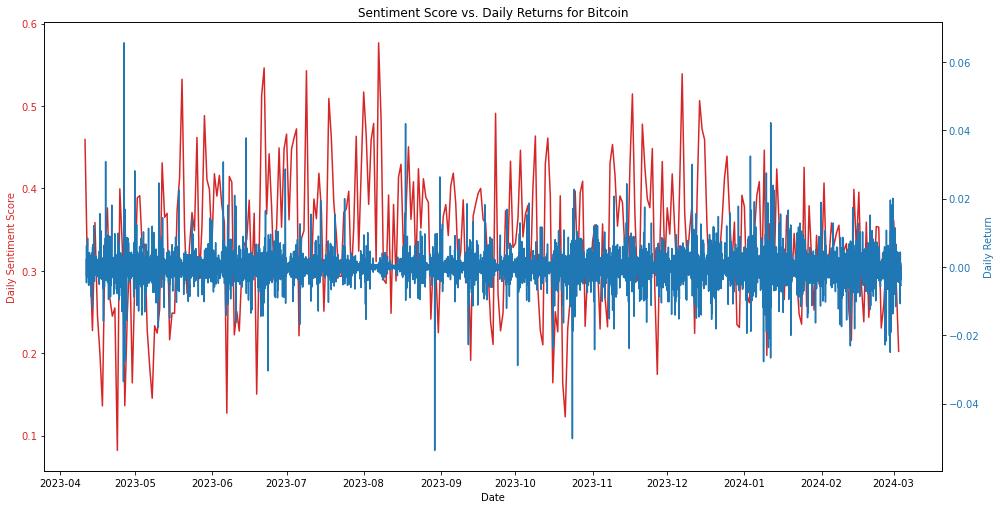

Correlation coefficient between daily sentiment scores and daily returns for Bitcoin: -0.10606029726968497


In [33]:
import matplotlib.pyplot as plt
import numpy as np  

# Ensure that date columns are in datetime format
telegram_df['date'] = pd.to_datetime(telegram_df['date'])
btc_df['Date_time'] = pd.to_datetime(btc_df['Date_time'])

# Calculate average sentiment scores per day for Telegram
daily_sentiment = telegram_df.groupby(telegram_df['date'].dt.date)['compound'].mean().reset_index()
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])  

# Calculate daily price changes for each cryptocurrency
def calculate_daily_returns(df):
    df['daily_return'] = df['Close'].pct_change()
    return df

# Apply the function to relevant data
ada_df = calculate_daily_returns(ada_df)
bch_df = calculate_daily_returns(bch_df)
btc_df = calculate_daily_returns(btc_df)  
eth_df = calculate_daily_returns(eth_df)
ltc_df = calculate_daily_returns(ltc_df)
xrp_df = calculate_daily_returns(xrp_df)

try:
    # Visualization of sentiment scores and prices for Bitcoin
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Sentiment Score', color=color)
    ax1.plot(daily_sentiment['date'].values, daily_sentiment['compound'].values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('Daily Return', color=color)  
    ax2.plot(btc_df['Date_time'].values, btc_df['daily_return'].values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Otherwise the right y-label is slightly clipped
    plt.title('Sentiment Score vs. Daily Returns for Bitcoin')
    plt.show()

    # Correlation analysis between sentiment scores and price movements for Bitcoin
    merged_data = pd.merge_asof(daily_sentiment.sort_values('date'), btc_df.sort_values('Date_time'), left_on='date', right_on='Date_time')
    correlation = merged_data['compound'].corr(merged_data['daily_return'])
    print("Correlation coefficient between daily sentiment scores and daily returns for Bitcoin:", correlation)

except pd.errors.ParserError as e:
    print("A parsing error occurred:", e)
except FileNotFoundError as e:
    print("File not found:", e)
except Exception as e:
    print("An unexpected error occurred:", e)


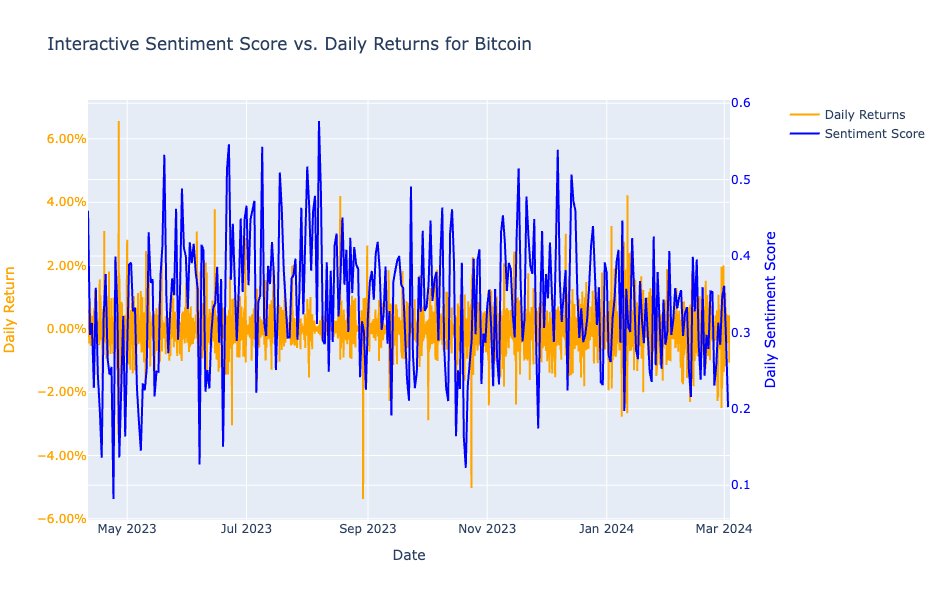

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creating a graph with subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding the daily returns data series for Bitcoin
fig.add_trace(
    go.Scatter(x=btc_df['Date_time'], y=btc_df['daily_return'], name='Daily Returns', mode='lines', line=dict(color='orange')),
    secondary_y=False,
)

# Adding the sentiment score data series
fig.add_trace(
    go.Scatter(x=daily_sentiment['date'], y=daily_sentiment['compound'], name='Sentiment Score', mode='lines', line=dict(color='blue')),
    secondary_y=True,
)

# Formatting the graph
fig.update_layout(
    title_text='Interactive Sentiment Score vs. Daily Returns for Bitcoin',
    xaxis_title='Date',
    height=600
)

# Formatting the Y-axes
fig.update_yaxes(title_text="Daily Return", secondary_y=False, tickformat=".2%", color='orange')
fig.update_yaxes(title_text="Daily Sentiment Score", secondary_y=True, color='blue')

# Displaying the graph
fig.show()


In [35]:
# Define a threshold for significant peaks (e.g., changes greater than 2x the standard deviation)
threshold_returns = 2 * btc_df['daily_return'].std()
threshold_sentiment = 2 * daily_sentiment['compound'].std()

# Identify days where variations exceed the threshold
significant_returns = btc_df[abs(btc_df['daily_return']) > threshold_returns]
significant_sentiments = daily_sentiment[abs(daily_sentiment['compound']) > threshold_sentiment]

# Display the results
print("Days with significant price variations:")
print(significant_returns[['Date_time', 'daily_return']])

print("\nDays with significant sentiment changes:")
print(significant_sentiments[['date', 'compound']])


Days with significant price variations:
               Date_time  daily_return
932  2024-03-03 15:00:00     -0.010736
976  2024-03-01 19:00:00     -0.011611
981  2024-03-01 14:00:00      0.011447
999  2024-02-29 20:00:00      0.009129
1001 2024-02-29 18:00:00     -0.013657
...                  ...           ...
8616 2023-04-17 10:00:00      0.010609
8627 2023-04-16 23:00:00      0.015602
8684 2023-04-14 14:00:00      0.012099
8699 2023-04-13 23:00:00     -0.012024
8709 2023-04-13 13:00:00     -0.008756

[378 rows x 2 columns]

Days with significant sentiment changes:
          date  compound
0   2023-04-11  0.459314
1   2023-04-12  0.296696
2   2023-04-13  0.312352
3   2023-04-14  0.227469
4   2023-04-15  0.358538
..         ...       ...
323 2024-02-28  0.283762
324 2024-02-29  0.346122
325 2024-03-01  0.360957
326 2024-03-02  0.287998
327 2024-03-03  0.202220

[318 rows x 2 columns]


In [36]:
# Merge the significant data
significant_merged = pd.merge_asof(significant_sentiments.sort_values('date'), significant_returns.sort_values('Date_time'), left_on='date', right_on='Date_time')
correlation_significant = significant_merged['compound'].corr(significant_merged['daily_return'])
print("Correlation between significant sentiment changes and price changes for Bitcoin:", correlation_significant)


Correlation between significant sentiment changes and price changes for Bitcoin: 0.02301585204773471


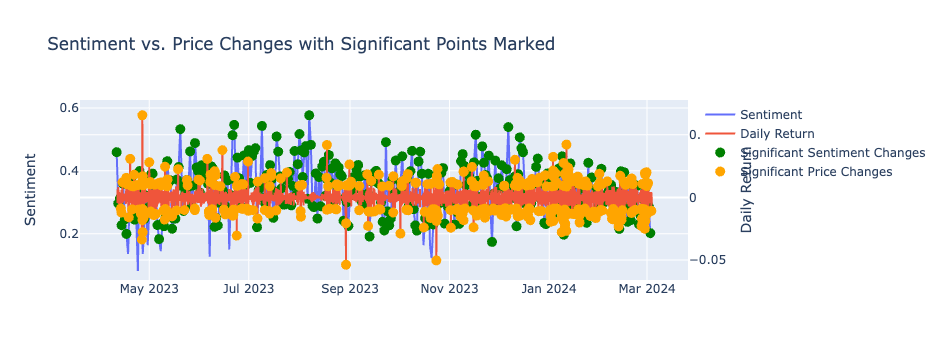

In [37]:
# Create an interactive plot with markers for significant days
fig = go.Figure()

# Add the normal traces
fig.add_trace(go.Scatter(x=daily_sentiment['date'], y=daily_sentiment['compound'], mode='lines', name='Sentiment'))
fig.add_trace(go.Scatter(x=btc_df['Date_time'], y=btc_df['daily_return'], mode='lines', name='Daily Return', yaxis='y2'))

# Add points for significant variations
fig.add_trace(go.Scatter(x=significant_sentiments['date'], y=significant_sentiments['compound'], mode='markers', name='Significant Sentiment Changes', marker=dict(color='green', size=10)))
fig.add_trace(go.Scatter(x=significant_returns['Date_time'], y=significant_returns['daily_return'], mode='markers', name='Significant Price Changes', marker=dict(color='orange', size=10), yaxis='y2'))

# Update the layout
fig.update_layout(title='Sentiment vs. Price Changes with Significant Points Marked', yaxis=dict(title='Sentiment'), yaxis2=dict(title='Daily Return', overlaying='y', side='right'))
fig.show()


In [38]:
# Causality Tests

from statsmodels.tsa.stattools import grangercausalitytests

# Preparing the data for the Granger test
granger_data = pd.merge_asof(daily_sentiment.sort_values('date'), btc_df.sort_values('Date_time'), left_on='date', right_on='Date_time')
granger_data.dropna(inplace=True)  # Ensure there are no missing values

# Running the Granger test
maxlag = 5  # Test up to 5 days lag
test_results = grangercausalitytests(granger_data[['daily_return', 'compound']], maxlag=maxlag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4051  , p=0.0207  , df_denom=323, df_num=1
ssr based chi2 test:   chi2=5.4553  , p=0.0195  , df=1
likelihood ratio test: chi2=5.4102  , p=0.0200  , df=1
parameter F test:         F=5.4051  , p=0.0207  , df_denom=323, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8640  , p=0.0585  , df_denom=320, df_num=2
ssr based chi2 test:   chi2=5.8175  , p=0.0545  , df=2
likelihood ratio test: chi2=5.7661  , p=0.0560  , df=2
parameter F test:         F=2.8640  , p=0.0585  , df_denom=320, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4750  , p=0.0164  , df_denom=317, df_num=3
ssr based chi2 test:   chi2=10.6551 , p=0.0137  , df=3
likelihood ratio test: chi2=10.4837 , p=0.0149  , df=3
parameter F test:         F=3.4750  , p=0.0164  , df_denom=317, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.8697  , p=0.0233  

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning:

verbose is deprecated since functions should not print results



In [39]:
import yfinance as yf

# Download market data for Bitcoin
btc_data = yf.download(tickers='BTC-USD', period='1y', interval='1d')  

# Examine the retrieved data
print(btc_data.head())


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2023-05-16  27171.513672  27299.304688  26878.947266  27036.650391   
2023-05-17  27035.470703  27465.927734  26600.144531  27398.802734   
2023-05-18  27401.650391  27466.527344  26415.101562  26832.208984   
2023-05-19  26826.753906  27128.619141  26700.210938  26890.128906   
2023-05-20  26888.841797  27155.158203  26843.277344  27129.585938   

               Adj Close       Volume  
Date                                   
2023-05-16  27036.650391  12732238816  
2023-05-17  27398.802734  15140006925  
2023-05-18  26832.208984  15222938600  
2023-05-19  26890.128906  11258983301  
2023-05-20  27129.585938   7044911360  


In [40]:
# Download market data for Bitcoin
btc_data = yf.download(tickers='BTC-USD', start='2023-04-11', end='2024-03-04', interval='1d')

# Ensure the index is in datetime format
btc_data.index = pd.to_datetime(btc_data.index)

# Filter the data for the specified period
filtered_btc_data = btc_data.loc['2023-04-11':'2024-03-04']

# Display the filtered data
print(filtered_btc_data)

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2023-04-11  29653.679688  30509.083984  29609.300781  30235.058594   
2023-04-12  30231.582031  30462.480469  29725.574219  30139.052734   
2023-04-13  29892.740234  30539.845703  29878.623047  30399.066406   
2023-04-14  30409.562500  31005.607422  30044.498047  30485.699219   
2023-04-15  30490.750000  30601.740234  30245.882812  30318.496094   
...                  ...           ...           ...           ...   
2024-02-28  57071.097656  63913.132812  56738.425781  62504.789062   
2024-02-29  62499.183594  63585.644531  60498.730469  61198.382812   
2024-03-01  61168.062500  63155.101562  60802.527344  62440.632812   
2024-03-02  62431.652344  62458.699219  61657.289062  62029.847656   
2024-03-03  62031.578125  63230.210938  61435.023438  63167.371094   

               Adj Close       Volume  
Date                                   
2023-04-1

In [41]:
if 'Volume' in btc_df.columns:
    btc_df.rename(columns={'Volume': 'Volume_btc_df'}, inplace=True)

# Join now without collision
btc_df = btc_df.join(btc_data[['Volume']], how='left')
print(btc_df)


               Date_time       Close  daily_return  Volume
923  2024-03-04 00:00:00  63491.2650           NaN     NaN
924  2024-03-03 23:00:00  63149.6250     -0.005381     NaN
925  2024-03-03 22:00:00  62845.0400     -0.004823     NaN
926  2024-03-03 21:00:00  62857.3600      0.000196     NaN
927  2024-03-03 20:00:00  62800.5150     -0.000904     NaN
...                  ...         ...           ...     ...
8753 2023-04-11 17:00:00  30234.4575     -0.000878     NaN
8754 2023-04-11 16:00:00  30154.8480     -0.002633     NaN
8755 2023-04-11 15:00:00  30225.8525      0.002355     NaN
8756 2023-04-11 14:00:00  30086.3725     -0.004615     NaN
8757 2023-04-11 13:00:00  30268.7250      0.006061     NaN

[7835 rows x 4 columns]


In [42]:
btc_df['Date_time'] = pd.to_datetime(btc_df['Date_time'])

btc_df.set_index('Date_time', inplace=True)

btc_df = btc_df.resample('D').mean()

In [44]:
btc_df['Volume'] = btc_data['Volume']

In [45]:
print(btc_df.head())

                   Close  daily_return        Volume
Date_time                                           
2023-04-11  30211.248545      0.000029  2.012126e+10
2023-04-12  30005.952562      0.000346  1.865193e+10
2023-04-13  30253.153979     -0.001036  1.748772e+10
2023-04-14  30616.166583      0.000516  2.266000e+10
2023-04-15  30386.208208      0.000135  1.194069e+10


In [46]:
btc_df = btc_df[['Close', 'daily_return', 'Volume']]
print(btc_df)

                   Close  daily_return        Volume
Date_time                                           
2023-04-11  30211.248545      0.000029  2.012126e+10
2023-04-12  30005.952562      0.000346  1.865193e+10
2023-04-13  30253.153979     -0.001036  1.748772e+10
2023-04-14  30616.166583      0.000516  2.266000e+10
2023-04-15  30386.208208      0.000135  1.194069e+10
...                  ...           ...           ...
2024-02-29  62122.322708     -0.000057  6.549661e+10
2024-03-01  61895.780208     -0.000542  4.018637e+10
2024-03-02  62026.633333      0.000383  2.388847e+10
2024-03-03  62233.992917     -0.001127  2.625381e+10
2024-03-04  63491.265000           NaN           NaN

[329 rows x 3 columns]


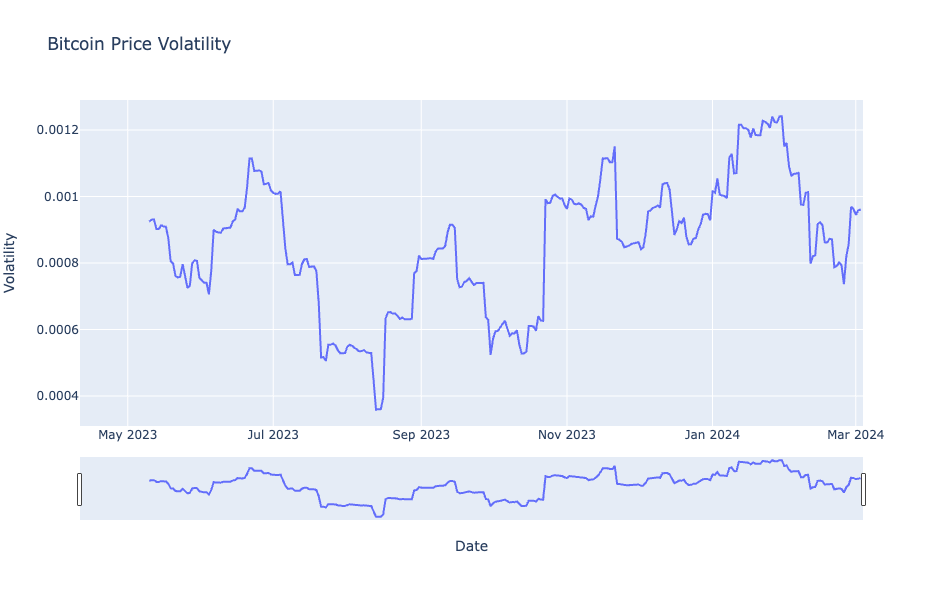

In [48]:
# Calculate the 30-day rolling volatility for Bitcoin
btc_df['rolling_volatility'] = btc_df['daily_return'].rolling(window=30).std()

# Create the Plotly figure
fig = go.Figure()

# Add the volatility trace
fig.add_trace(go.Scatter(x=btc_df.index, y=btc_df['rolling_volatility'], mode='lines', name='30-Day Volatility'))

# Update the chart layout
fig.update_layout(
    title='Bitcoin Price Volatility',
    xaxis_title='Date',
    yaxis_title='Volatility',
    width=1200,
    height=600,
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)

# Display the chart
fig.show()

In [49]:
# Calculate the average daily sentiment scores for Telegram
daily_sentiment = telegram_df.groupby(telegram_df['date'].dt.date)['compound'].mean().reset_index()
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Calculate the daily price and volume changes for Bitcoin
btc_df['daily_return'] = btc_df['Close'].pct_change()
btc_df['daily_volume_change'] = btc_df['Volume'].pct_change()


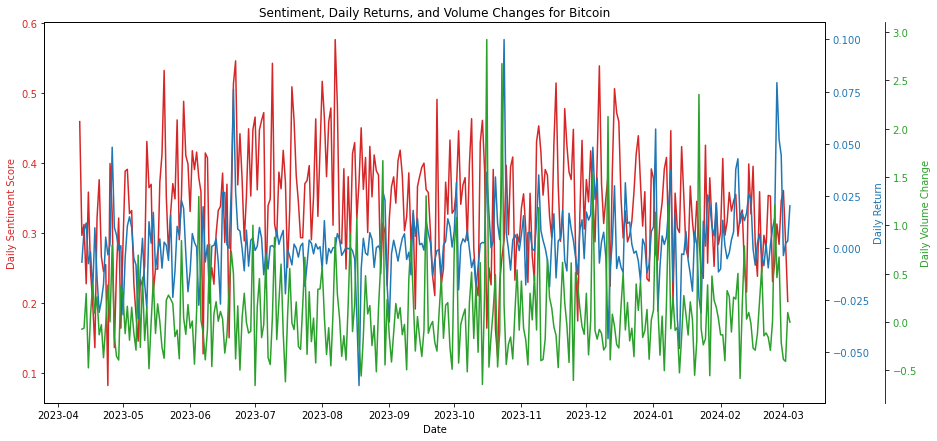

In [51]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Sentiment Scores
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Sentiment Score', color=color)
ax1.plot(daily_sentiment['date'].values, daily_sentiment['compound'].values, color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# Daily Returns
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Daily Return', color=color)
ax2.plot(btc_df.index.values, btc_df['daily_return'].values, color=color) 
ax2.tick_params(axis='y', labelcolor=color)

# Volume Changes
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  
color = 'tab:green'
ax3.set_ylabel('Daily Volume Change', color=color)
ax3.plot(btc_df.index.values, btc_df['daily_volume_change'].values, color=color) 
ax3.tick_params(axis='y', labelcolor=color)

plt.title('Sentiment, Daily Returns, and Volume Changes for Bitcoin')
plt.show()


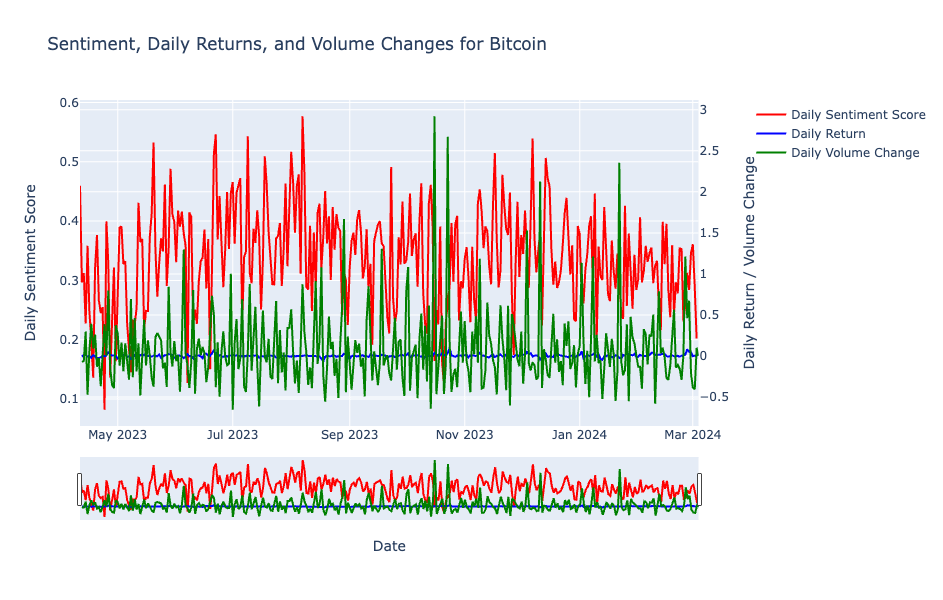

In [52]:
# Create a figure with secondary axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add sentiment
fig.add_trace(
    go.Scatter(x=daily_sentiment['date'], y=daily_sentiment['compound'], name='Daily Sentiment Score', line=dict(color='red')),
    secondary_y=False,
)

# Add daily returns for Bitcoin
fig.add_trace(
    go.Scatter(x=btc_df.index, y=btc_df['daily_return'], name='Daily Return', line=dict(color='blue')),
    secondary_y=True,
)

# Add volume changes for Bitcoin
fig.add_trace(
    go.Scatter(x=btc_df.index, y=btc_df['daily_volume_change'], name='Daily Volume Change', line=dict(color='green')),
    secondary_y=True,
)

# Update axis labels and add range slider
fig.update_layout(
    title_text="Sentiment, Daily Returns, and Volume Changes for Bitcoin",
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="date"
    ),
    width=1200,
    height=600
)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Daily Sentiment Score", secondary_y=False)
fig.update_yaxes(title_text="Daily Return / Volume Change", secondary_y=True)

# Display the chart
fig.show()


In [53]:
# Merge data for correlation analysis
merged_data = pd.merge_asof(daily_sentiment.sort_values('date'), btc_df, left_on='date', right_index=True)

# Calculate correlation
corr_sentiment_returns = merged_data['compound'].corr(merged_data['daily_return'])
corr_sentiment_volume = merged_data['compound'].corr(merged_data['daily_volume_change'])

print("Correlation coefficient between sentiment and daily returns:", corr_sentiment_returns)
print("Correlation coefficient between sentiment and daily volume changes:", corr_sentiment_volume)


Correlation coefficient between sentiment and daily returns: 0.038416185401808266
Correlation coefficient between sentiment and daily volume changes: -0.13169654035568784


In [54]:
import statsmodels.api as sm

# Prepare data for regression
X = sm.add_constant(merged_data['compound'])
y = merged_data['daily_return']

# Regression model
model = sm.OLS(y, X, missing='drop').fit() 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           daily_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4803
Date:                Thu, 16 May 2024   Prob (F-statistic):              0.489
Time:                        06:44:19   Log-Likelihood:                 862.53
No. Observations:                 327   AIC:                            -1721.
Df Residuals:                     325   BIC:                            -1713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.004     -0.084      0.9

In [64]:
pip install arch

     |████████████████████████████████| 920 kB 21.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
